In [119]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Connection to the database
host = creds[2]
user = creds[0]
password = creds[1]
database = creds[3]
port = creds[4]
mydb = mysql.connector.connect(host=host, user=user, database=database, port=port, password=password, auth_plugin='mysql_native_password')
mycursor = mydb.cursor()

#Safecheck to guarantee that the connection worked
mycursor.execute('SHOW TABLES;')
print(f"Tables: {mycursor.fetchall()}")
print(mydb.connection_id) #it'll give connection_id,if got connected

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',)]
909


In [122]:
alertP1 = pd.read_sql("""SELECT * FROM ConsultaUrgencia_doentespedidosconsultaNeurologia2012""",mydb)
alertP1
alertP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124160 entries, 0 to 124159
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ID_DOENTE                      124160 non-null  object 
 1   NUM_PROCESSO                   124160 non-null  object 
 2   MODULO                         124160 non-null  object 
 3   EPISODIO                       124160 non-null  object 
 4   ESPECIALIDADE_RESPONSAVEL      96782 non-null   float64
 5   DES_ESPECIALIDADE_RESPONSAVEL  124160 non-null  object 
 6   ESPECIALIDADE_ALTA             27071 non-null   float64
 7   DES_ESPECIALIDADE_ALTA         124160 non-null  object 
 8   DATA_ADMISSAO                  124160 non-null  object 
 9   DATA_ALTA                      124160 non-null  object 
 10  TIPOESP                        124160 non-null  object 
 11  MTS                            124160 non-null  object 
 12  COD_LOCAL                     

Number of unique values in ESPECIALIDADE_RESPONSAVEL is 187
Number of empty cells is 27378
Percentage of the empty cells is 22.050579896907216
Unique values are : 20420.0    10683
20720.0     4052
20622.0     3547
20130.0     3477
20440.0     3374
           ...  
22630.0        1
20339.0        1
21540.0        1
20155.0        1
20697.0        1
Name: ESPECIALIDADE_RESPONSAVEL, Length: 187, dtype: int64


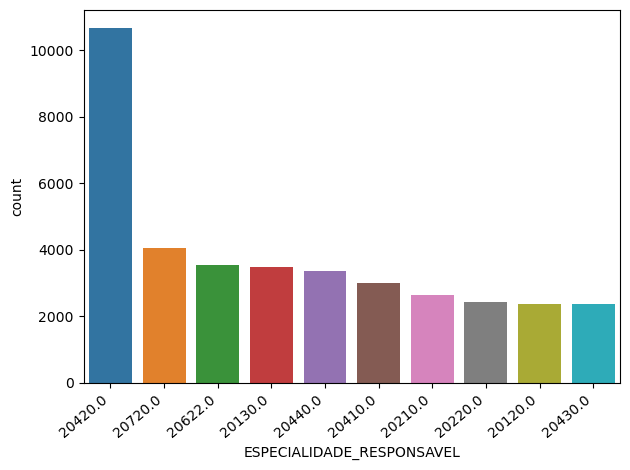

In [126]:
n_espec_res=alertP1["ESPECIALIDADE_RESPONSAVEL"].nunique()
print("Number of unique values in ESPECIALIDADE_RESPONSAVEL is "+ str(n_espec_res))
#number of empty values
print("Number of empty cells is "+ str(alertP1["ESPECIALIDADE_RESPONSAVEL"].isna().sum()))
#percentage of empty cells
print("Percentage of the empty cells is " + str(alertP1["ESPECIALIDADE_RESPONSAVEL"].isnull().sum()/alertP1["ESPECIALIDADE_RESPONSAVEL"].shape[0] * 100))
#the frequency of the values
print("Unique values are : " + str(alertP1["ESPECIALIDADE_RESPONSAVEL"].value_counts()))

ax=sns.countplot(x = 'ESPECIALIDADE_RESPONSAVEL',
                data = alertP1,
                order = alertP1.ESPECIALIDADE_RESPONSAVEL.value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()






188
0.0
                              27378
NEUROLOGIA                    10683
PSIQUIATRIA                    4052
CARDIOLOGIA ANTICOAGULACAO     3547
REUMATOLOGIA                   3477
                              ...  
PEDIAT. GASTROENTEROLOGIA         1
FISIATRIA- NEUROTOXINA            1
ANESTESIA - GRAVIDAS              1
PRE-CIRURGIA DERMATOLOGICA        1
ONCOLOGIA - PISO 8                1
Name: DES_ESPECIALIDADE_RESPONSAVEL, Length: 188, dtype: int64


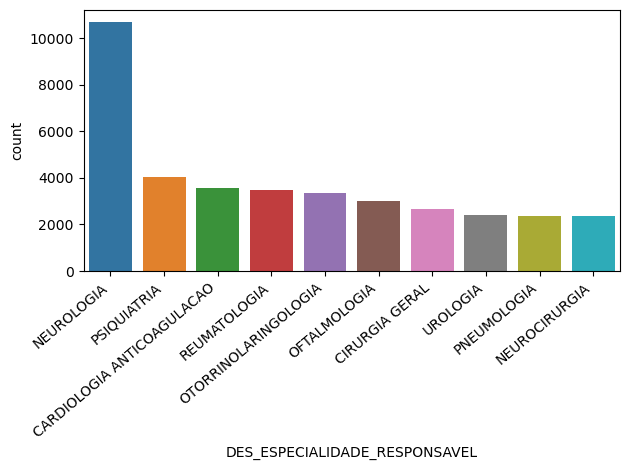

In [114]:

print(alertP1["DES_ESPECIALIDADE_RESPONSAVEL"].nunique())
#print("Number of unique values in ESPECIALIDADE_RESPONSAVEL is "+ str(n_espec_res))

#number of empty values
#print(alertP1["DES_ESPECIALIDADE_RESPONSAVEL"].isna().sum())

#percentage of empty cells
print(alertP1["DES_ESPECIALIDADE_RESPONSAVEL"].isnull().sum()/alertP1["DES_ESPECIALIDADE_RESPONSAVEL"].shape[0] * 100)
#count1=len(alertP1["DES_ESPECIALIDADE_RESPONSAVEL"]>0)


#the frequency of the values
print(alertP1["DES_ESPECIALIDADE_RESPONSAVEL"].value_counts())

df1 = alertP1[alertP1['DES_ESPECIALIDADE_RESPONSAVEL'].str.len() > 0]

sns.countplot(x = 'DES_ESPECIALIDADE_RESPONSAVEL',
                data = alertP1,
                order = alertP1.DES_ESPECIALIDADE_RESPONSAVEL.value_counts().iloc[:10].index)
ax = sns.countplot(x="DES_ESPECIALIDADE_RESPONSAVEL", data=alertP1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()




21
97089
97089
78.19668170103093
10000.0    16661
10210.0     2332
10730.0     1912
10440.0     1148
10410.0     1035
10420.0      918
10700.0      840
10430.0      744
10220.0      234
10120.0      216
10150.0      168
10170.0      161
10130.0      147
10660.0      109
10610.0      108
10630.0      103
10520.0       95
10140.0       62
10510.0       42
10160.0       34
10300.0        2
Name: ESPECIALIDADE_ALTA, dtype: int64


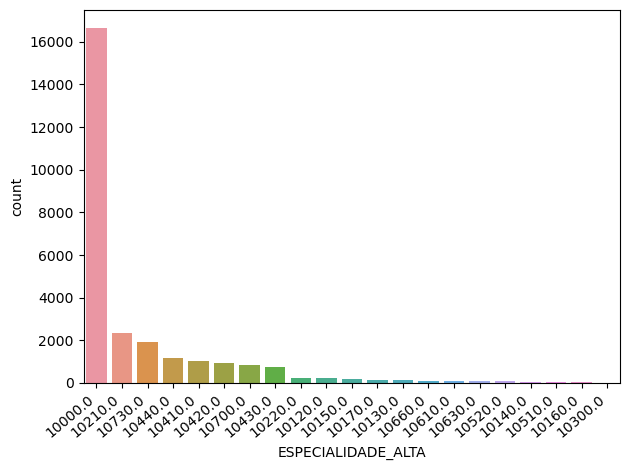

In [107]:
print(alertP1["ESPECIALIDADE_ALTA"].nunique())
#print("Number of unique values in ESPECIALIDADE_RESPONSAVEL is "+ str(n_espec_res))

#number of empty values
print(alertP1["ESPECIALIDADE_ALTA"].isna().sum())
print(alertP1["ESPECIALIDADE_ALTA"].isnull().sum())
#percentage of empty cells
print(alertP1["ESPECIALIDADE_ALTA"].isnull().sum()/alertP1["ESPECIALIDADE_ALTA"].shape[0] * 100)
#count1=len(alertP1["DES_ESPECIALIDADE_RESPONSAVEL"]>0)


#the frequency of the values
print(alertP1["ESPECIALIDADE_ALTA"].value_counts())

ax=sns.countplot(x = 'ESPECIALIDADE_ALTA',
                data = alertP1,
                order = alertP1['ESPECIALIDADE_ALTA'].value_counts().index)


ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()




22
0
0
0.0
                        97089
MEDICINA                16661
CIRURGIA GERAL           2332
TRAUMATOLOGIA            1912
OTORRINOLARINGOLOGIA     1148
OFTALMOLOGIA             1035
NEUROLOGIA                918
PSIQUIATRIA               840
NEUROCIRURGIA             744
UROLOGIA                  234
PNEUMOLOGIA               216
DERMATOLOGIA              168
GASTROENTEROLOGIA         161
REUMATOLOGIA              147
INFECCIOLOGIA             109
CARDIOLOGIA               108
CIRURGIA VASCULAR         103
OBSTETRICIA                95
NEFROLOGIA                 62
PEDIATRICA                 42
ENDOCRINOLOGIA             34
CIRURGIA PLASTICA           2
Name: DES_ESPECIALIDADE_ALTA, dtype: int64


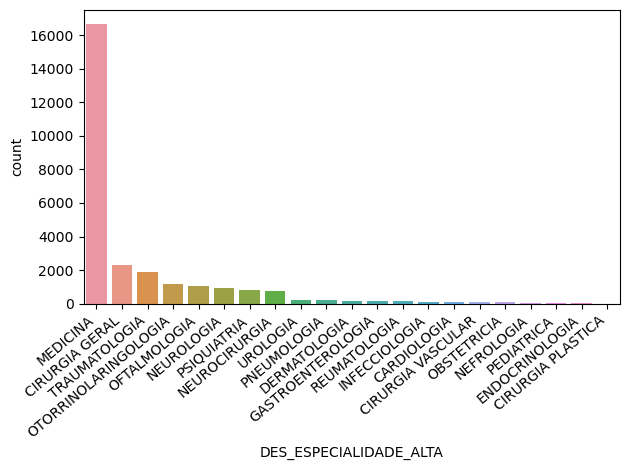

In [106]:
print(alertP1["DES_ESPECIALIDADE_ALTA"].nunique())
#print("Number of unique values in DES_ESPECIALIDADE_ALTA is "+ str(n_espec_res))

#number of empty values
print(alertP1["DES_ESPECIALIDADE_ALTA"].isna().sum())
print(alertP1["DES_ESPECIALIDADE_ALTA"].isnull().sum())
#percentage of empty cells
print(alertP1["DES_ESPECIALIDADE_ALTA"].isnull().sum()/alertP1["DES_ESPECIALIDADE_ALTA"].shape[0] * 100)
#count1=len(alertP1["DES_ESPECIALIDADE_RESPONSAVEL"]>0)




#the frequency of the values
print(alertP1["DES_ESPECIALIDADE_ALTA"].value_counts())



df = alertP1[alertP1['DES_ESPECIALIDADE_ALTA'].str.len() > 0]

ax=sns.countplot(x = 'DES_ESPECIALIDADE_ALTA',
                data = df,
                order = df['DES_ESPECIALIDADE_ALTA'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
